In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (184 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.2MB 66kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
from google.colab import files
files.upload()



Saving nlp.pdf to nlp.pdf


{'nlp.pdf': b'%PDF-1.7\r\n%\xb5\xb5\xb5\xb5\r\n1 0 obj\r\n<</Type/Catalog/Pages 2 0 R/Lang(en-US) /StructTreeRoot 30 0 R/MarkInfo<</Marked true>>/Metadata 153 0 R/ViewerPreferences 154 0 R>>\r\nendobj\r\n2 0 obj\r\n<</Type/Pages/Count 5/Kids[ 3 0 R 11 0 R 19 0 R 21 0 R 25 0 R] >>\r\nendobj\r\n3 0 obj\r\n<</Type/Page/Parent 2 0 R/Resources<</Font<</F1 5 0 R/F2 9 0 R>>/ExtGState<</GS7 7 0 R/GS8 8 0 R>>/ProcSet[/PDF/Text/ImageB/ImageC/ImageI] >>/MediaBox[ 0 0 612 792] /Contents 4 0 R/Group<</Type/Group/S/Transparency/CS/DeviceRGB>>/Tabs/S/StructParents 0>>\r\nendobj\r\n4 0 obj\r\n<</Filter/FlateDecode/Length 1066>>\r\nstream\r\nx\x9c\xddYYo\xe36\x10~7\xe0\xff\xc0Gi\x011\xe2!\x1e\xc1b\x81\x1c\xbbA\x8bM\x91]\x1b\xe8C\xdb\x07\'Q\xbc.|\xb4\xb6\x1c\xb4\xff\xbe3T\x14\x1f\xa2"K%\x8aE\x03D\x11\xa5\x11\xbfoN\x0e\x19rvG\xde\xbf?\xbb\xbd\xfa\xe1\x9a\xa4\x1f>\x90\xcb\xeb+\xf2\xe7p\x90\xd2\x14\x7f,\xe3$%\n\xae\xdar\xb2\xce\x87\x83\x9f\xdf\x91\xe5pp9\x1e\x0e\xce>1\xc2AN\x92\xf1\xd3p\xc0@.%\x8chNS.\x89N

In [6]:
images = convert_from_path('nlp.pdf')

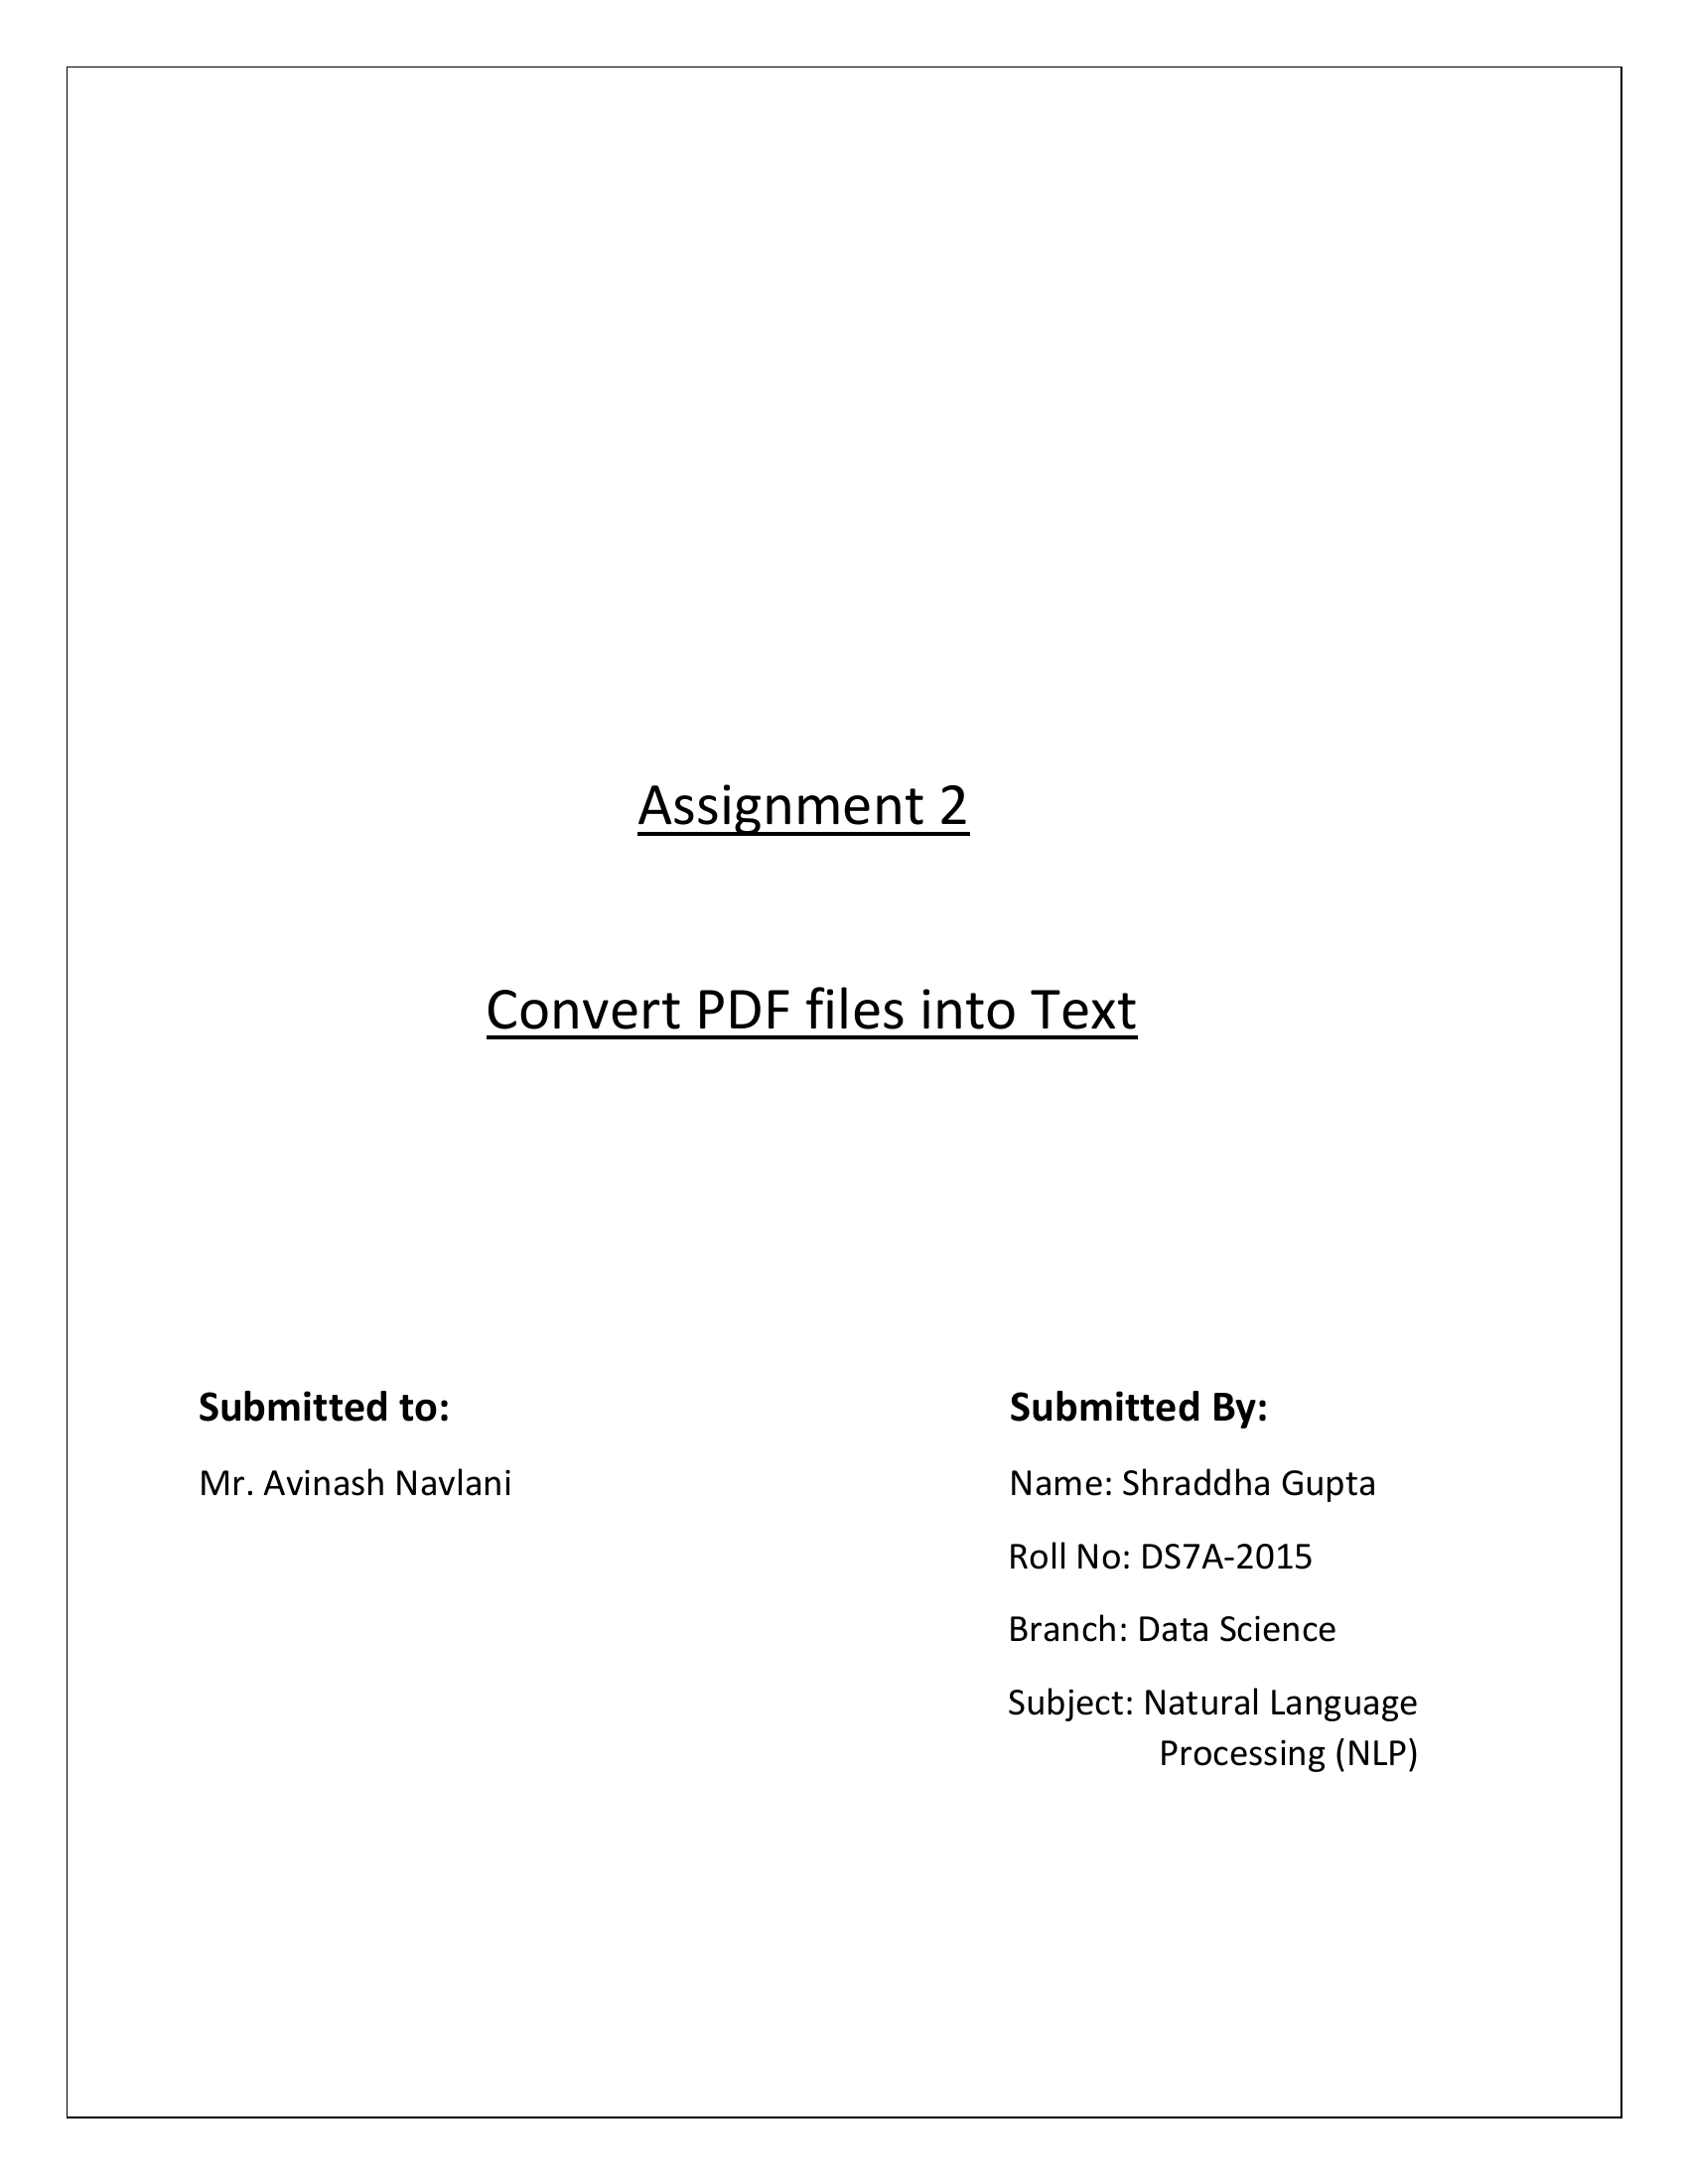

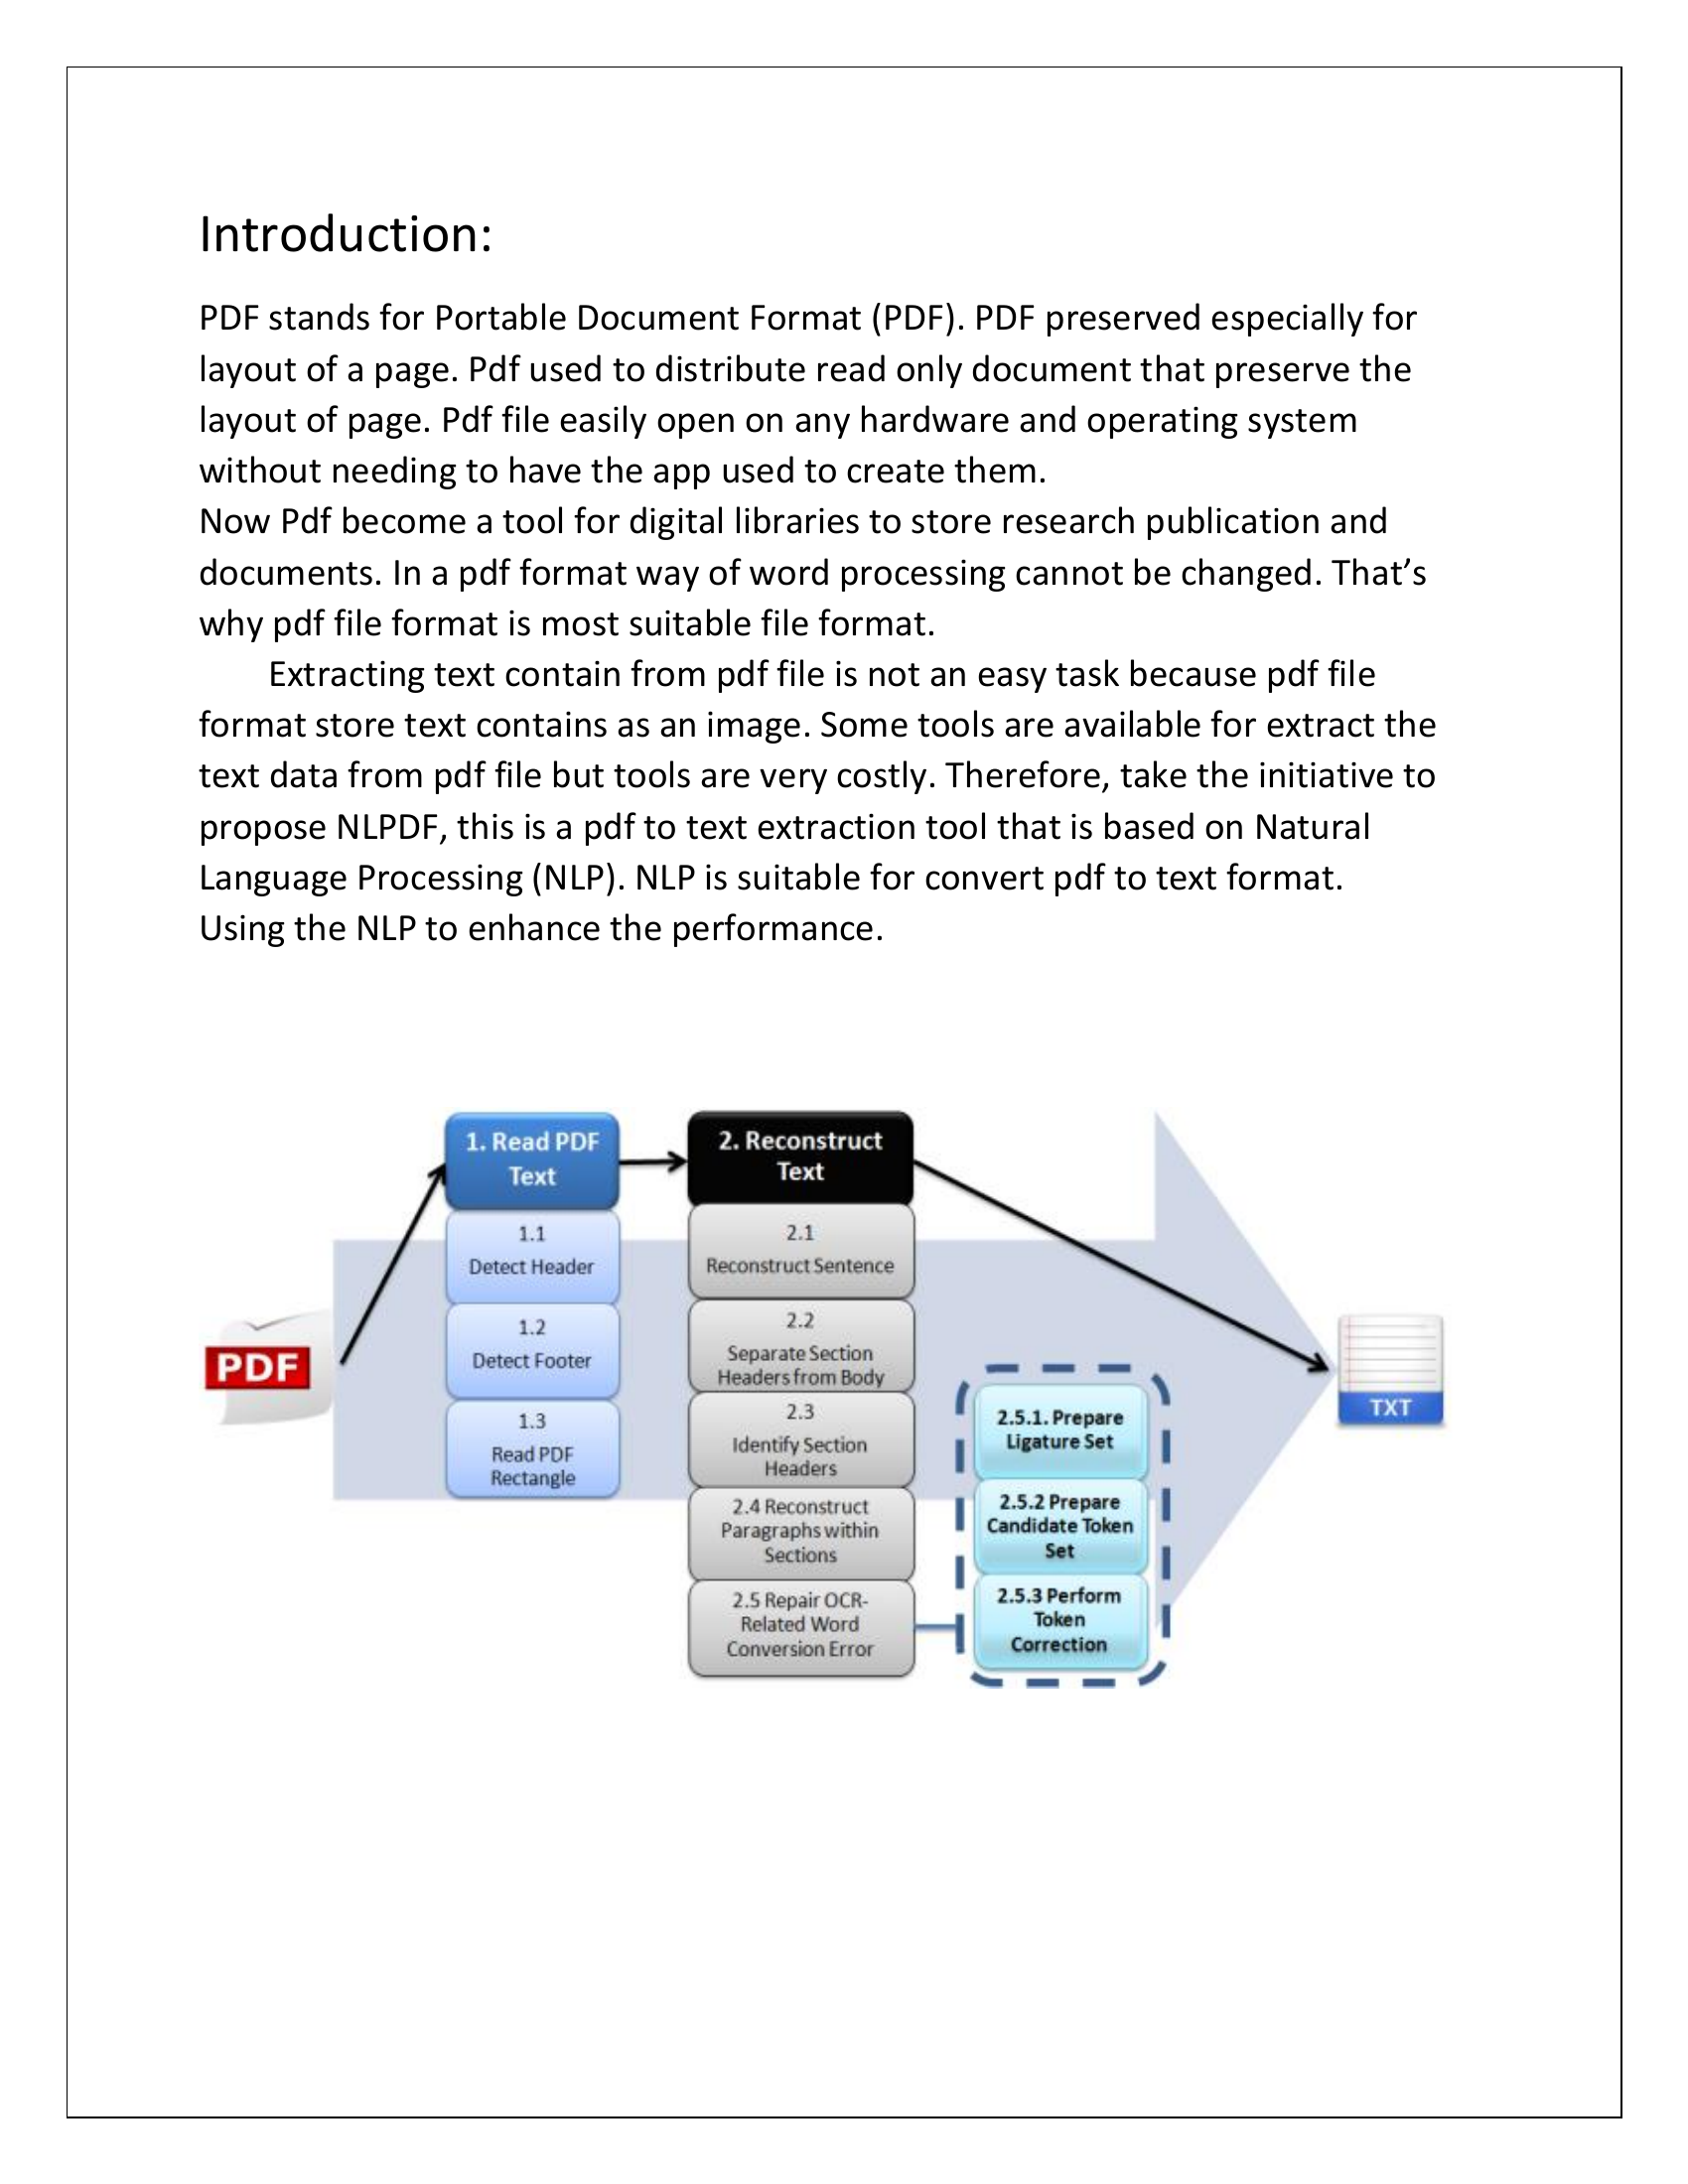

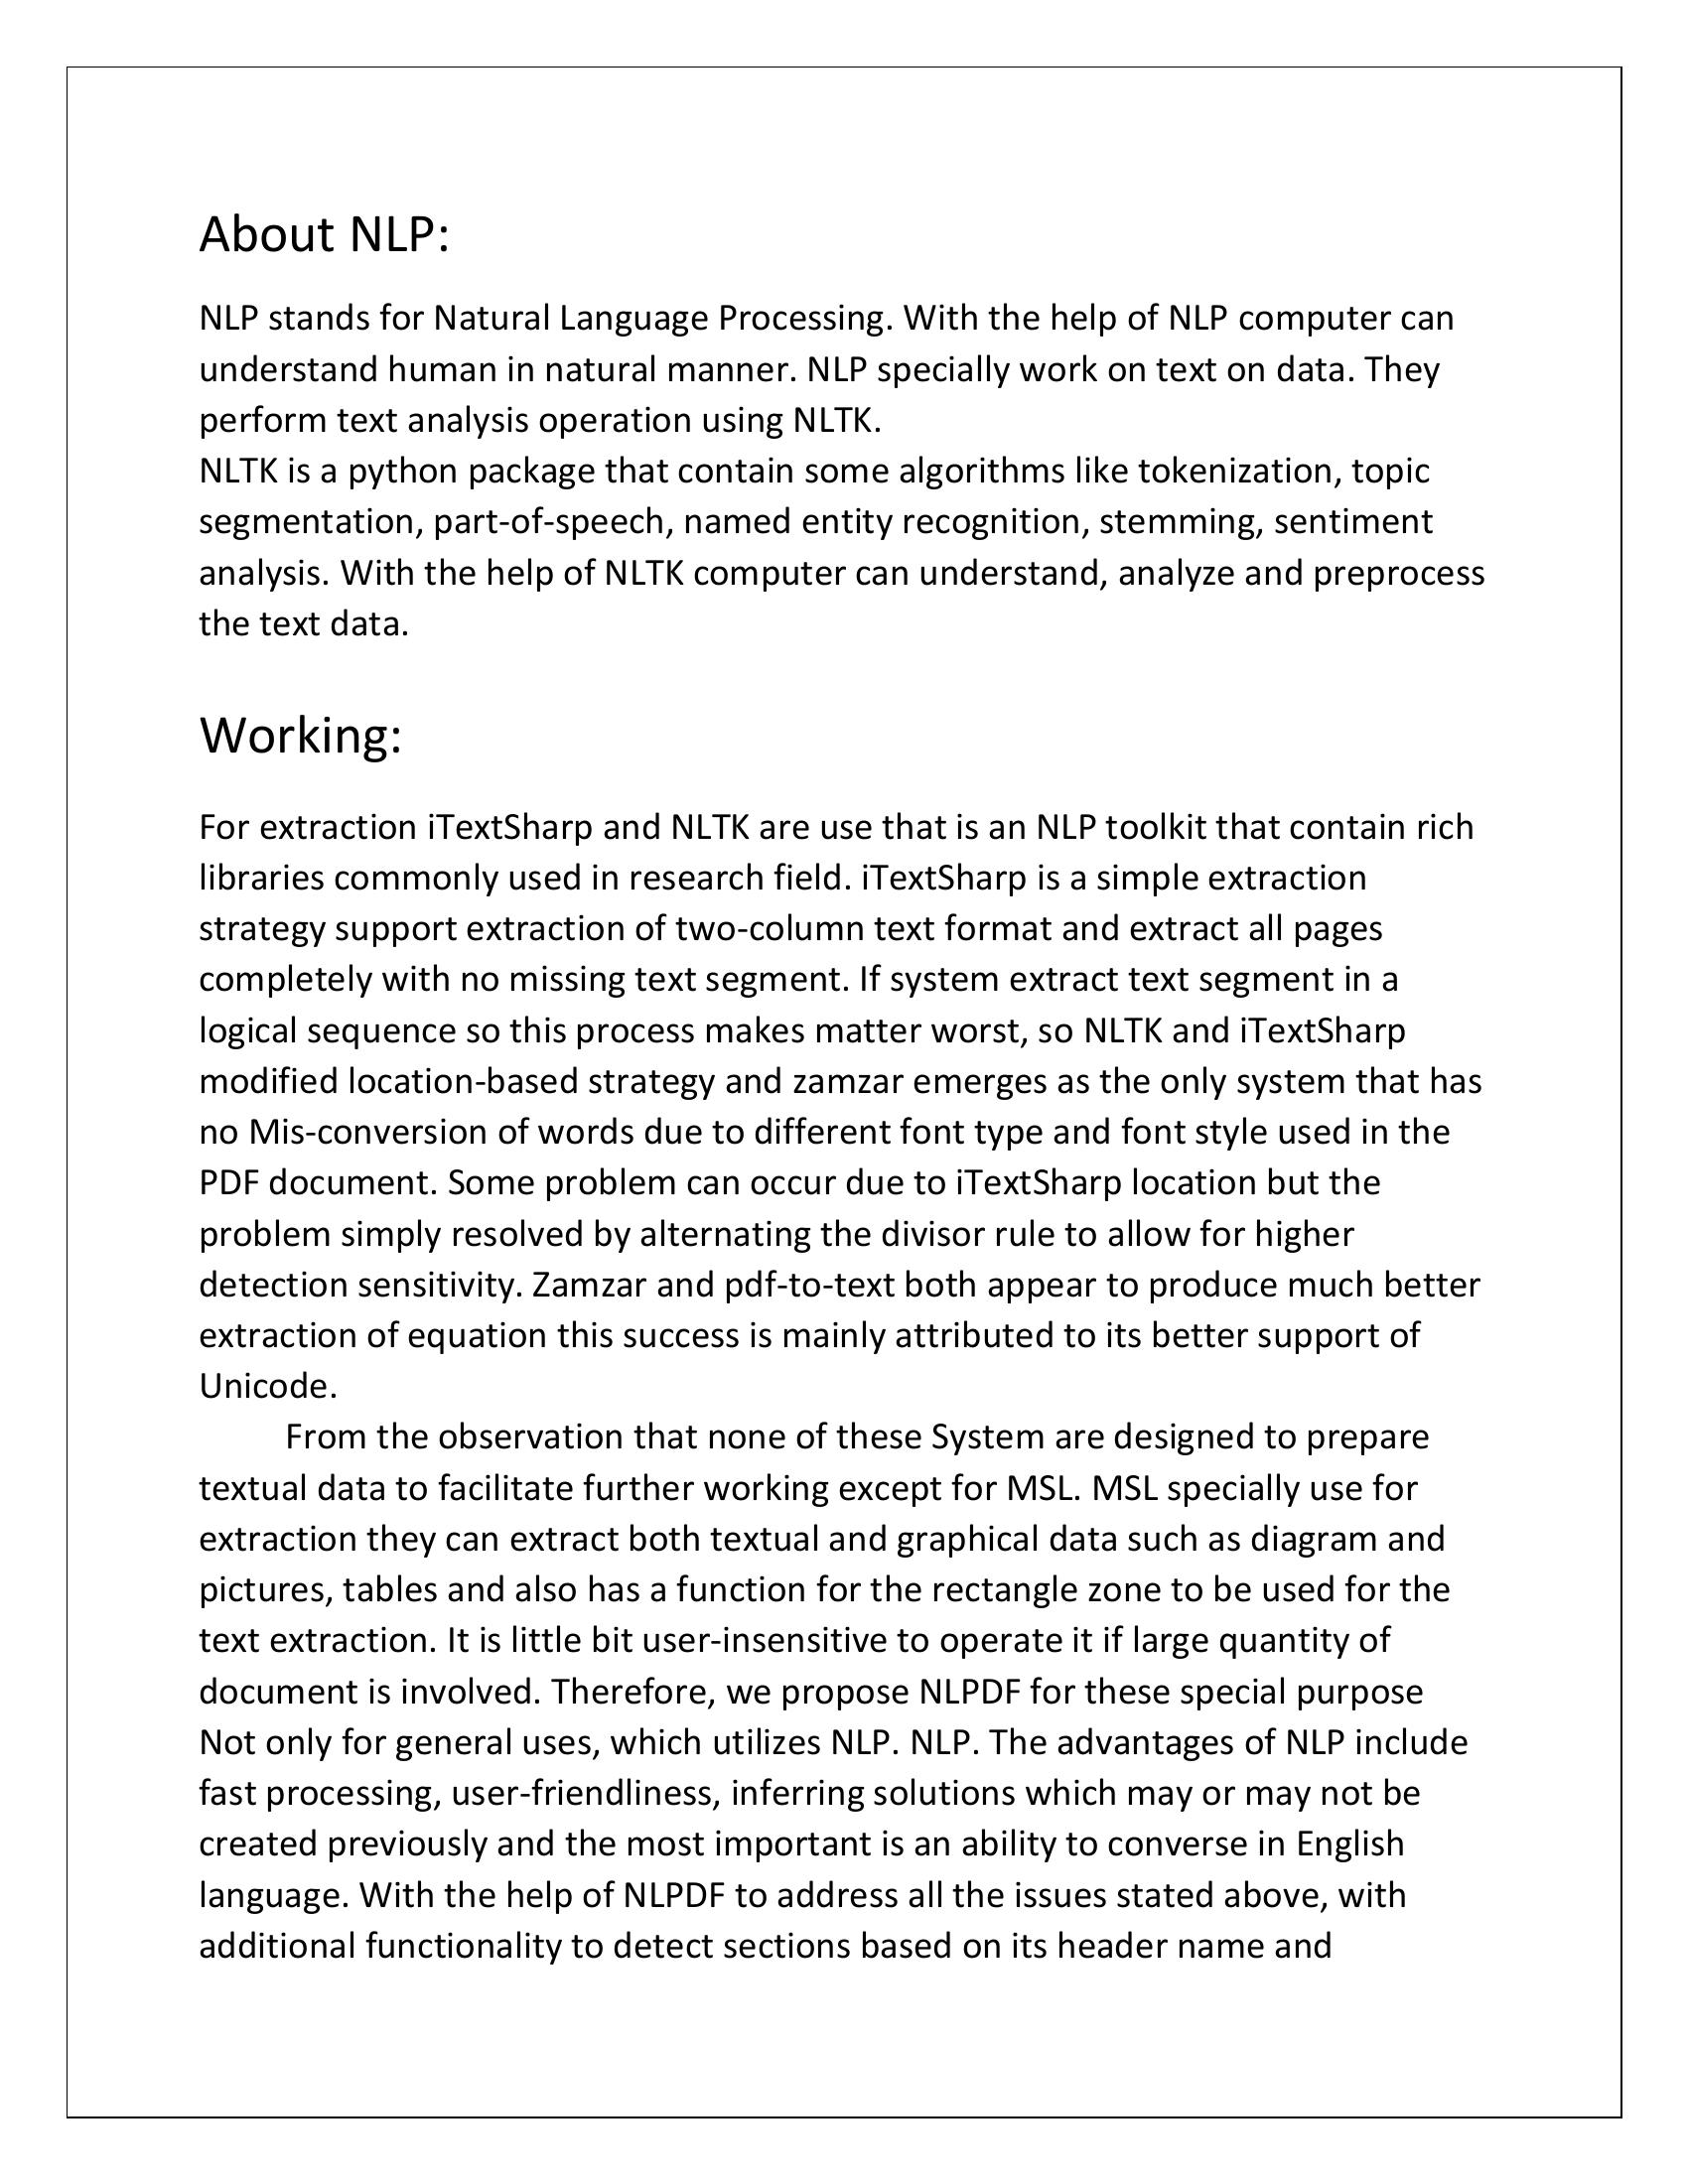

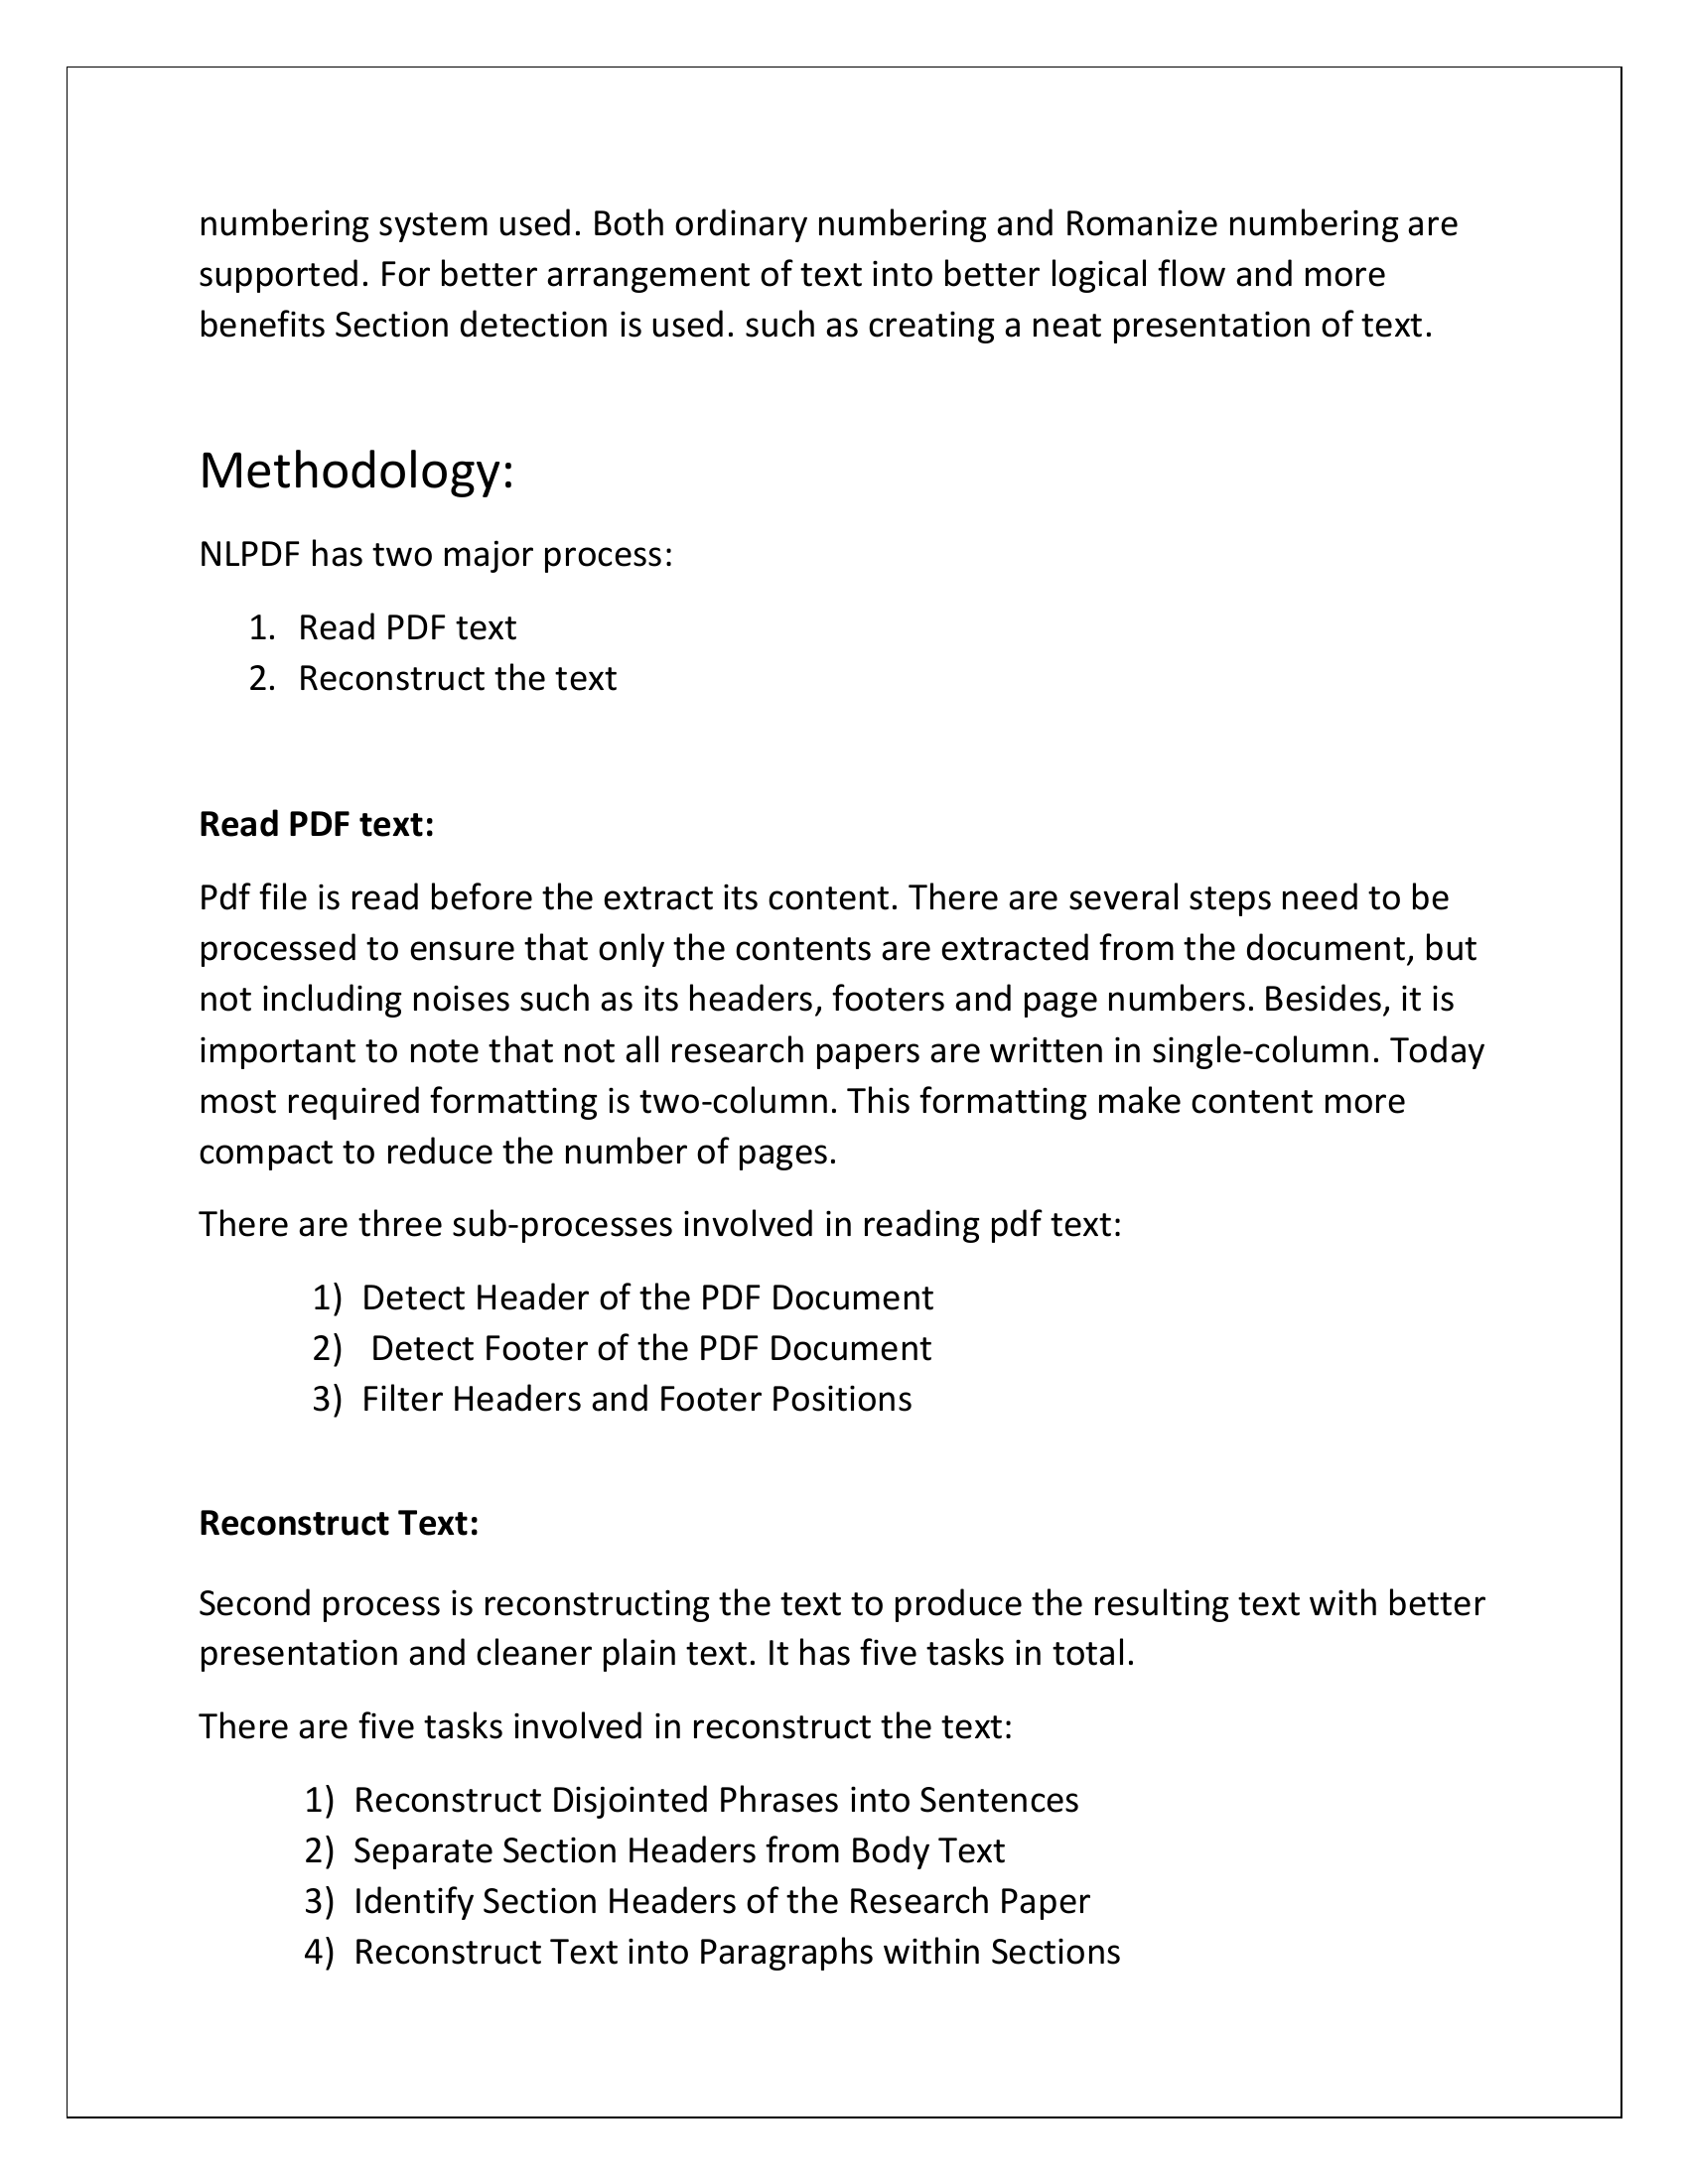

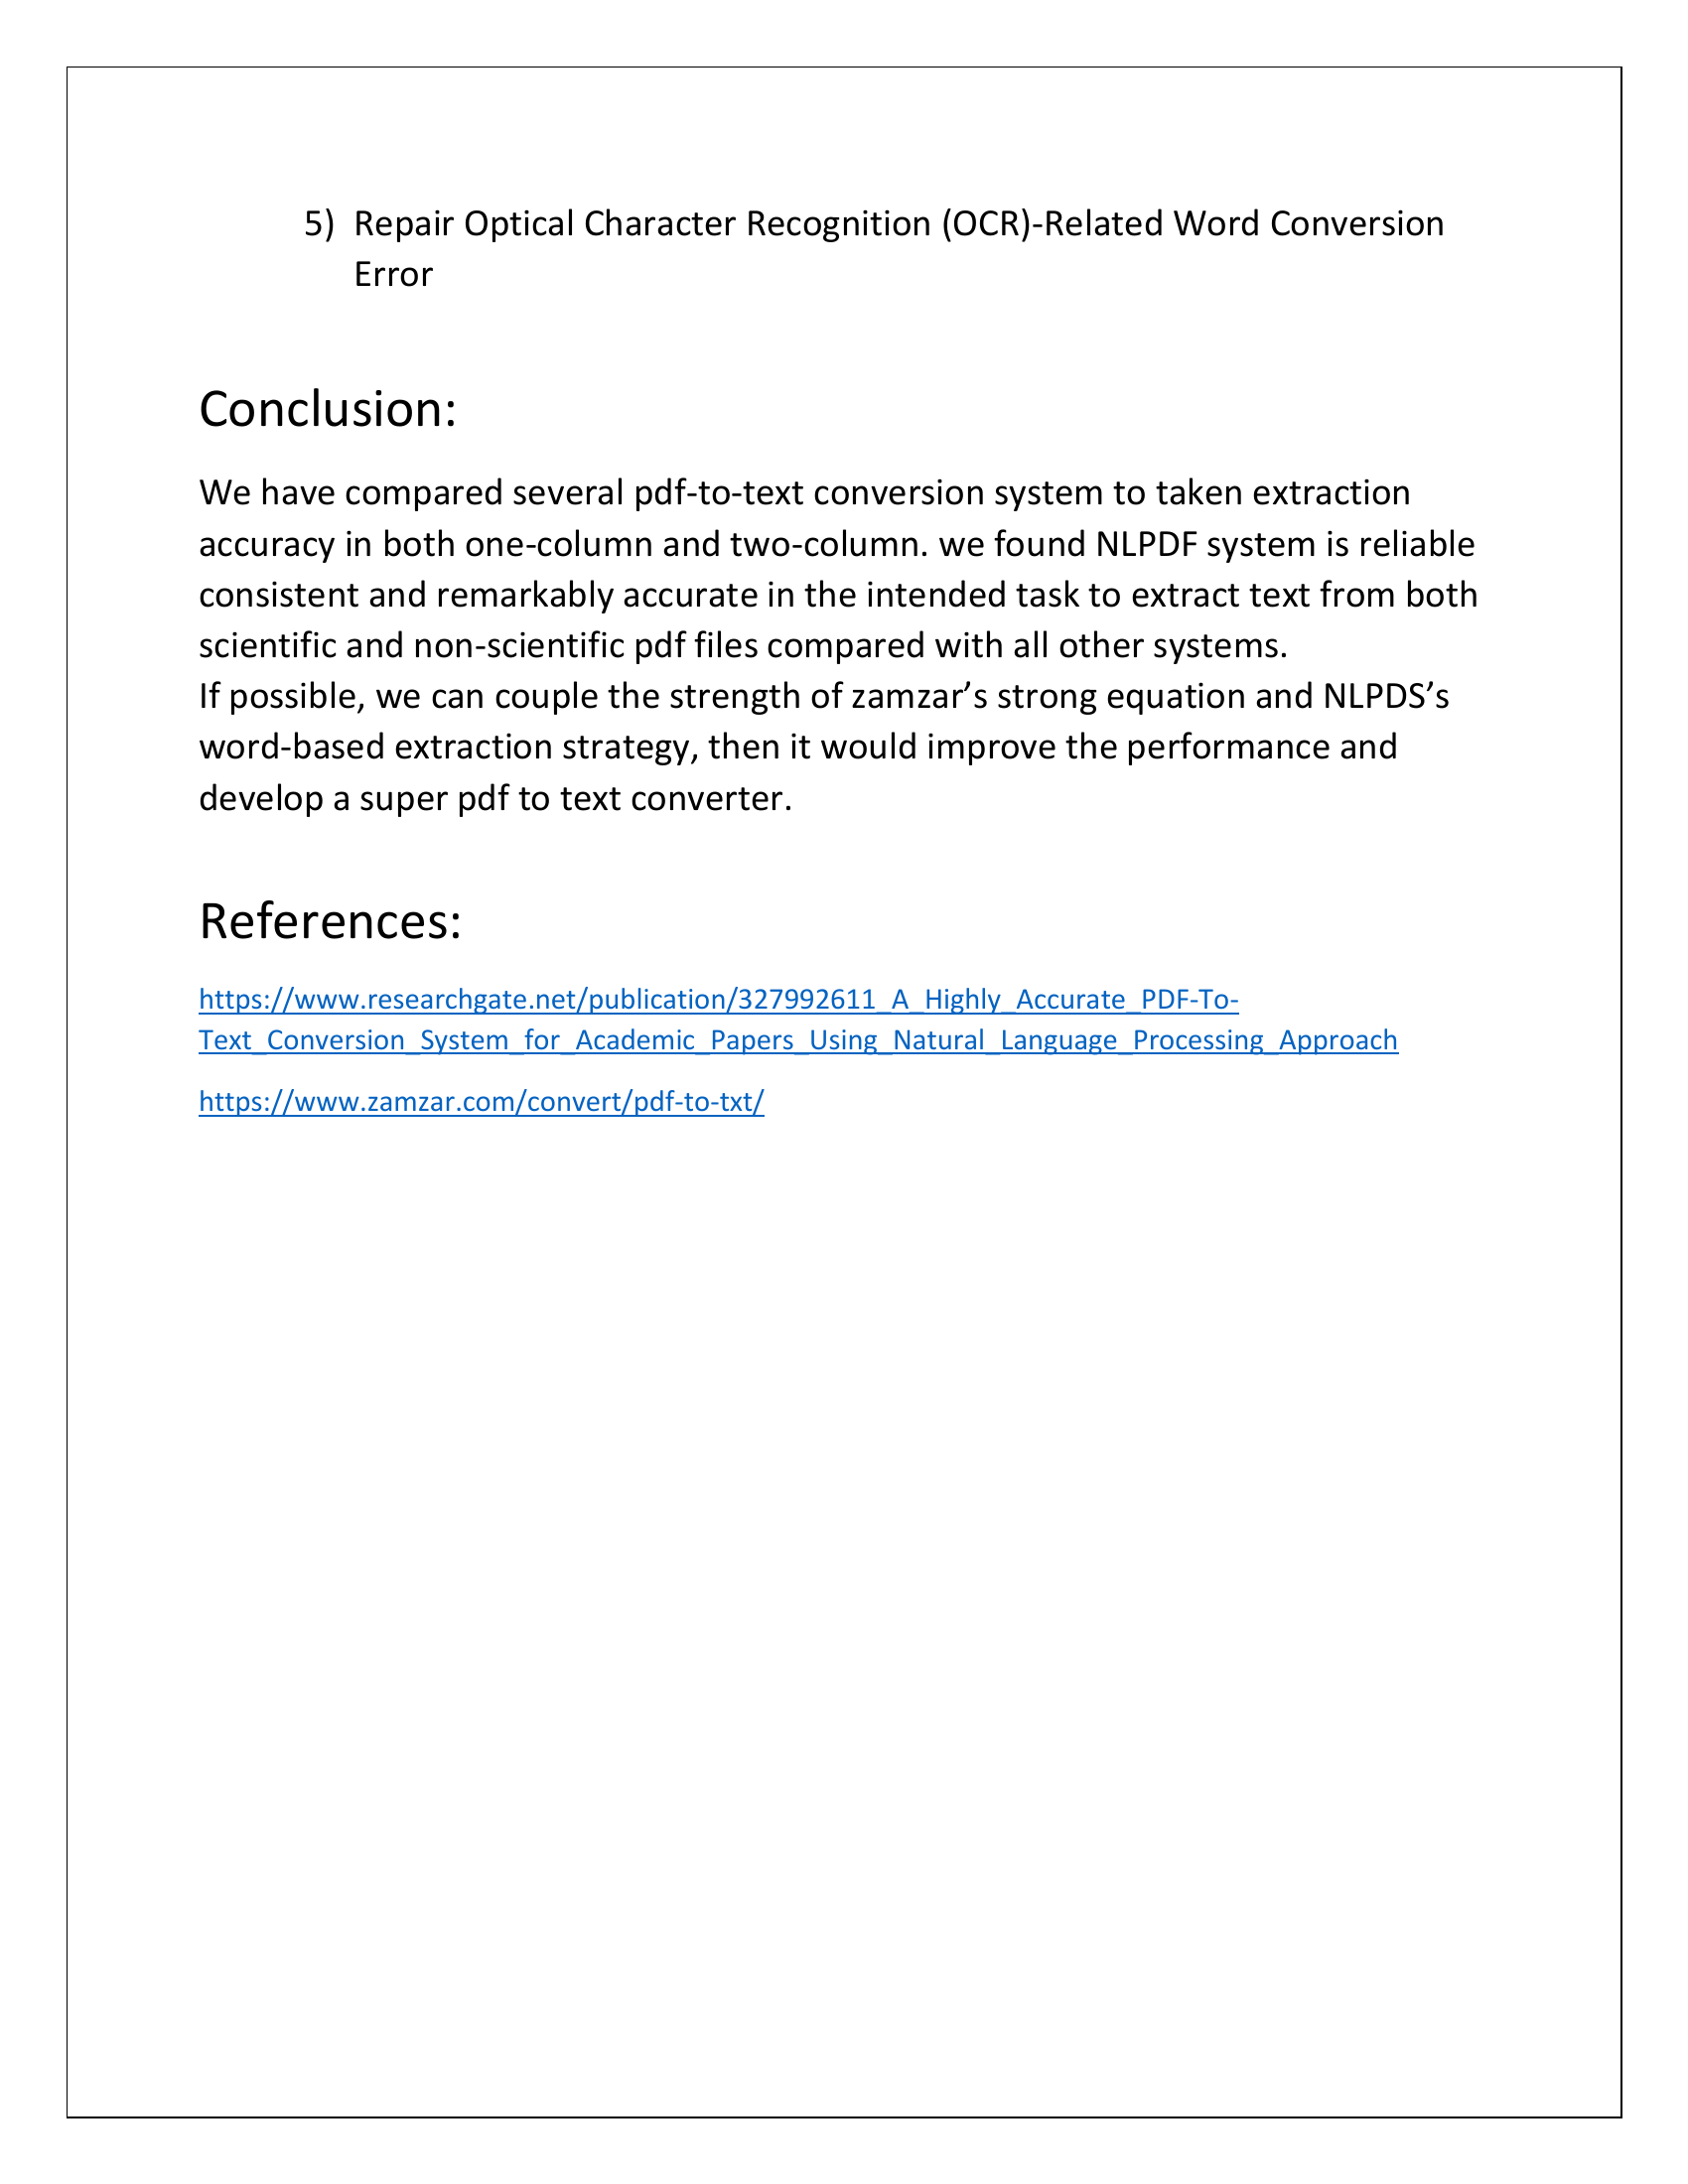

In [7]:
from IPython.display import display,Image
for i in range(len(images)):
   display(images[i])


In [8]:
for i in range(len(images)):
  bounds = reader.readtext(np.array(images[i]),min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch',beamWidth=10)
bounds
  

[([[300, 202], [1460, 202], [1460, 252], [300, 252]],
  '5) Repair Optical Character Recognition (OCR)-Related Word Conversion',
  0.724041619857221),
 ([[355, 259], [441, 259], [441, 295], [355, 295]],
  'Error',
  0.9999411433309986),
 ([[196, 384], [468, 384], [468, 440], [196, 440]],
  'Conclusion:',
  0.9999245538676658),
 ([[200, 470], [1426, 470], [1426, 524], [200, 524]],
  'We have compared several pdf-to-text conversion system to taken extraction',
  0.7963895614916104),
 ([[194, 523], [1492, 523], [1492, 576], [194, 576]],
  'accuracy in both one-column and two-column: we found NLPDF system is reliable',
  0.9437325630165432),
 ([[197, 579], [1493, 579], [1493, 623], [197, 623]],
  'consistent and remarkably accurate in the intended task to extract text from both',
  0.8684237912660108),
 ([[194, 624], [1299, 624], [1299, 680], [194, 680]],
  'scientific and non-scientific pdf files compared with all other systems',
  0.8418627989549632),
 ([[196, 678], [1466, 678], [1466, 7

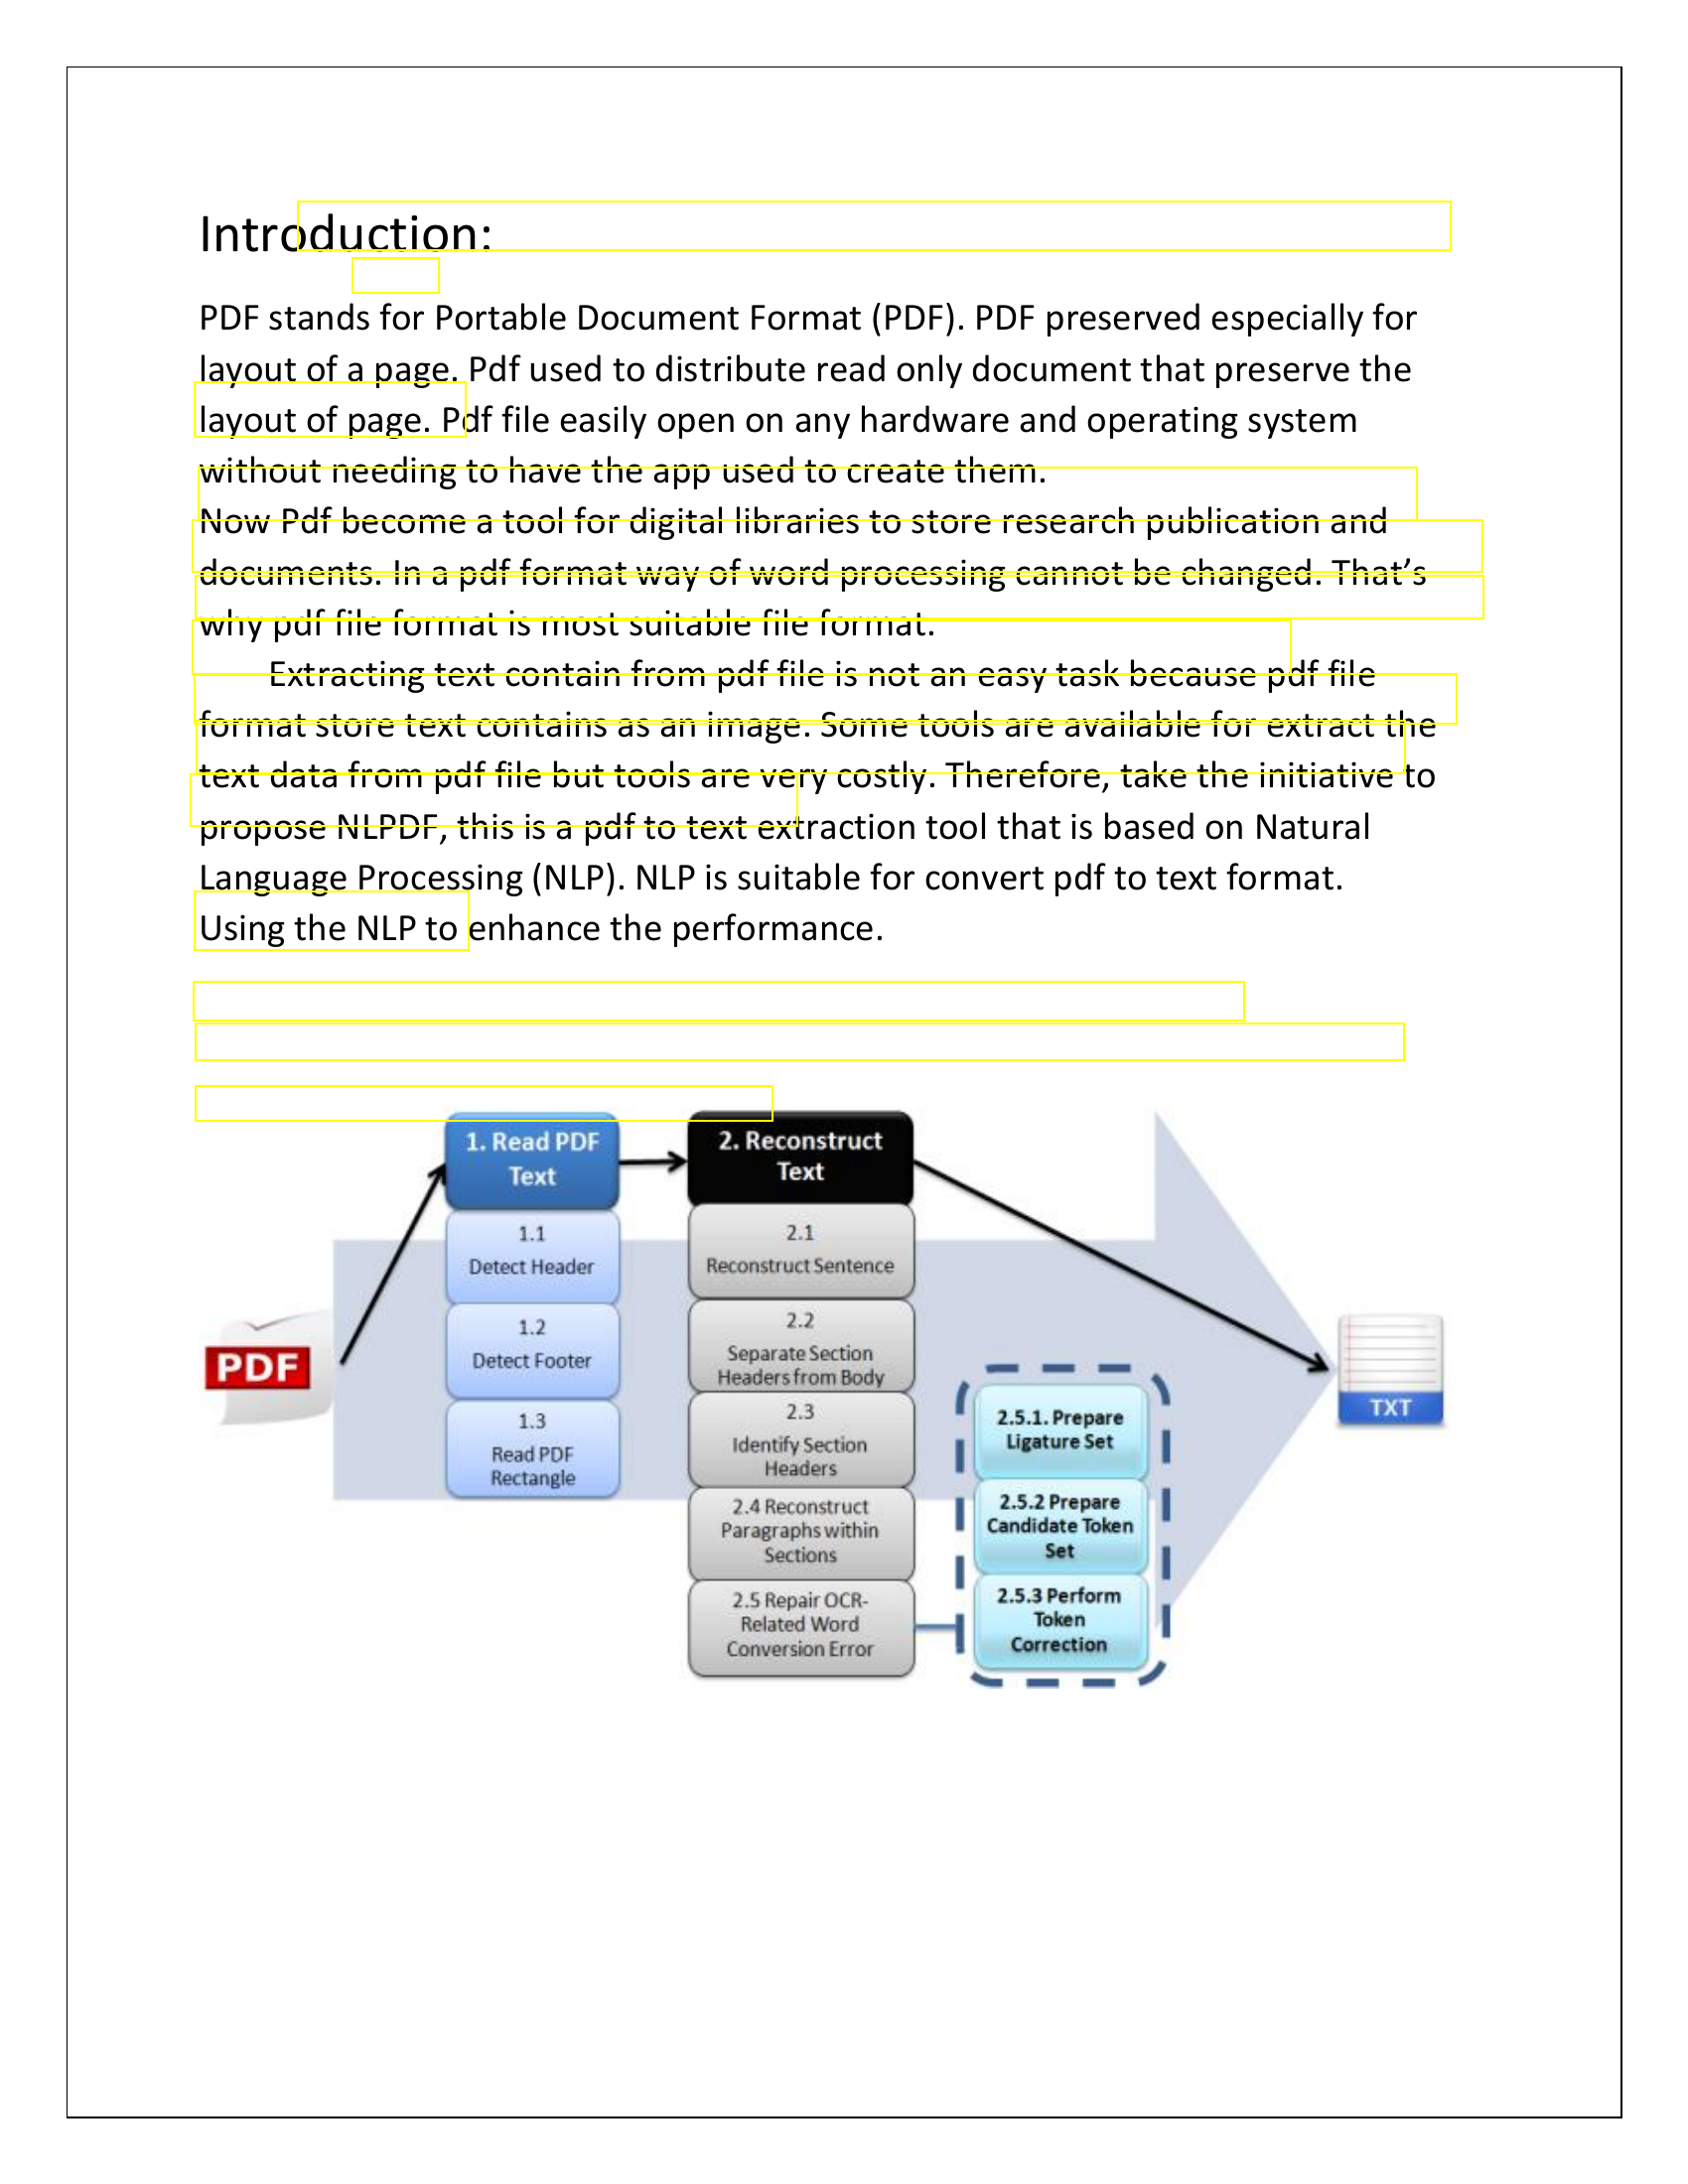

In [9]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[1],bounds)   

In [10]:
bounds[2][2]

0.9999245538676658

In [16]:
text=''
for i in range(len(bounds)):
  text = text+bounds[i][1]+'\n'
print(text)


5) Repair Optical Character Recognition (OCR)-Related Word Conversion
Error
Conclusion:
We have compared several pdf-to-text conversion system to taken extraction
accuracy in both one-column and two-column: we found NLPDF system is reliable
consistent and remarkably accurate in the intended task to extract text from both
scientific and non-scientific pdf files compared with all other systems
If possible, we can couple the strength of zamzar's strong equation and NLPDS's
word-based extraction strategy, then it would improve the performance and
develop a super pdf to text converter.
References:
https:]LWWW researchgate net/publication/327992611 A HighlyAccurate_PDF-To_
Text_ConversionSystem_for_Academic_Papers_Using_Natural_Language_Processing_Approach
https LLwWW zamzar com/convertIpdf-to-txtL



In [17]:
nlp=spacy.load('en_core_web_sm')

In [18]:
doc = nlp(text)

In [19]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent',jupyter=True)